In [1]:
import os
import copy
from rdkit import Chem
from rdkit.Chem import RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdDepictor, rdMolDraw2D
opts = Draw.DrawingOptions()
Draw.SetComicMode(opts)

In [3]:
path = os.path.join(RDConfig.RDDocsDir, 'cdk2.sdf')
mols = [m for m in Chem.SDMolSupplier(path)]
mols2D = copy.deepcopy(mols)
for m in mols2D:
    AllChem.Compute2DCoords(m)

OSError: File error: Bad input file /home/pi/.sage/local/lib/python3.10/site-packages/rdkit/Docs/cdk2.sdf

#Draw molecules with default rdkit function

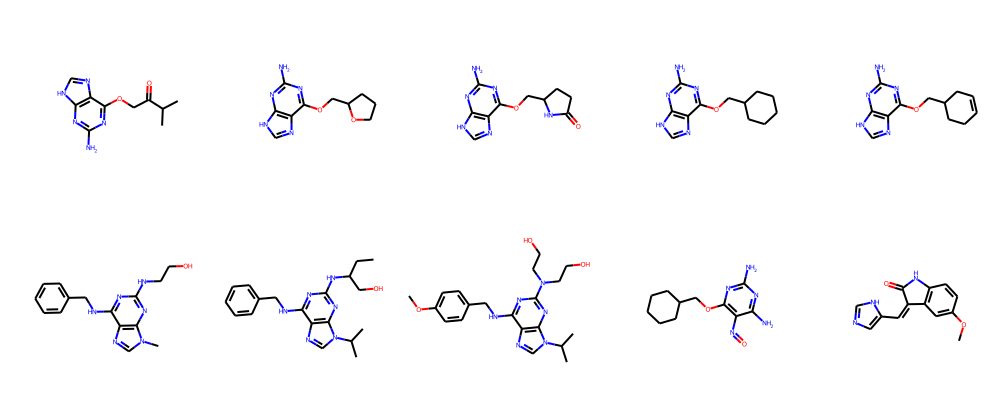

In [3]:
Draw.MolsToGridImage(mols2D[:10], molsPerRow=5)

In [4]:
import mols2grid

In [5]:
mols2grid.display(mols2D,
                 # RDKit's MolDrawOptions parameters
                  fixedBondLength=60,
                  # rename fields for the output document
                  subset=['id', 'img','Cluster'],
                  tooltip=['id'],
                  MolDrawingOptions=opts,
                )

# draw from file path

In [6]:
mols2grid.display(path,
                 # RDKit's MolDrawOptions parameters
                  fixedBondLength=60,
                  # rename fields for the output document
                  subset=['id', 'img','Cluster'],
                  tooltip=['id'],
                  MolDrawingOptions=opts,
                )

#Draw from pandas dataframe

In [7]:
import pandas as dpd
from rdkit.Chem import PandasTools
df = PandasTools.LoadSDF(path)
df['SMILES'] = df['ROMol'].apply(Chem.MolToSmiles)
mols2grid.display(df,
                 # RDKit's MolDrawOptions parameters
                  fixedBondLength=60,
                  # rename fields for the output document
                  subset=['id', 'img','Cluster'],
                  tooltip=['id'],
                  MolDrawingOptions=opts,
                )

In [8]:
print(mols2grid.selection)

{0: 'CC(C)C(=O)COc1nc(N)nc2[nH]cnc12', 6: 'CCC(CO)Nc1nc(NCc2ccccc2)c2ncn(C(C)C)c2n1'}


In [9]:
print(mols2grid.utils.mol_to_record(mols2D[0]))

{'SMILES': 'CC(C)C(=O)COc1nc(N)nc2[nH]cnc12', '_Name': 'ZINC03814457', '_MolFileInfo': '                    3D', '_MolFileComments': ' Structure written by MMmdl.', '_MolFileChiralFlag': 1, 'id': 'ZINC03814457', 'Cluster': 1, 'MODEL.SOURCE': 'CORINA 3.44 0027  09.01.2008', 'MODEL.CCRATIO': 1, 'r_mmffld_Potential_Energy-OPLS_2005': -78.6454, 'r_mmffld_RMS_Derivative-OPLS_2005': 0.000213629, 'b_mmffld_Minimization_Converged-OPLS_2005': 1, 'mol': <rdkit.Chem.rdchem.Mol object at 0x7fb6db273c10>}
